In [1]:
#importing dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston

In [2]:
#understanding the dataset
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#access data attributes 
dataset = boston.data
for name, index in enumerate(boston.feature_names):
    print(index,name)

CRIM 0
ZN 1
INDUS 2
CHAS 3
NOX 4
RM 5
AGE 6
DIS 7
RAD 8
TAX 9
PTRATIO 10
B 11
LSTAT 12


In [7]:
#Reshaping data i.e 506 to 506,1 =(1-d to 2-d array)
data = dataset[:,12].reshape(-1,1)


In [8]:
#shape of the data 
np.shape(dataset)

(506, 13)

In [9]:
#target values
target = boston.target.reshape(-1,1)

In [10]:
#shape of target
np.shape(target)

(506, 1)

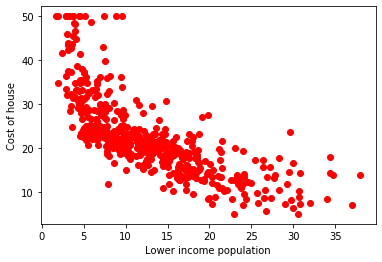

In [11]:
#ensuring that matplitlib is working inside notebook
%matplotlib inline
plt.scatter(data, target, color = 'red')
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [21]:
#Regression using Lasso 
#Can also use Ridge, LinearRegression
#for this data using the types won't take much difference but it usually makes difference depending upon datasets.
from sklearn.linear_model import Lasso

#creating a regression model
reg = Lasso()

#fit the model
reg.fit(data,target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [22]:
#Prediction
pred = reg.predict(data)

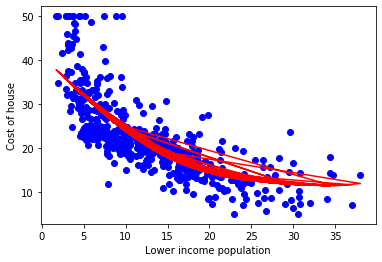

In [39]:
#plotting the model
%matplotlib inline
plt.scatter(data, target, color = 'blue')
plt.plot(data, pred, color = 'red')    #do not use scatter since you do not want it as a scatter point  but as a line
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [40]:
#Now to satisfy ourselves we need to optimise using new model
#circumventing curve issue using polynomial model. (It will fit right curve using variables,giving appropriate degree to curve)
from sklearn.preprocessing import PolynomialFeatures
# We cannot fit two models together ,we need something intermediate called as pipeline.
from sklearn.pipeline import make_pipeline 

In [41]:
#Now make the two models pipeline
model = make_pipeline(PolynomialFeatures(7),reg) #7 will make it a cubical curve


In [42]:
model.fit(data,target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8611.557099148758, tolerance: 4.2716295415019765
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=7, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [43]:
pred = model.predict(data)


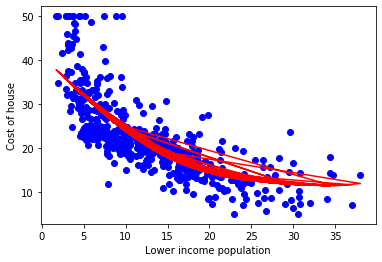

In [44]:
#Plotting the optimised model
%matplotlib inline
plt.scatter(data, target, color = 'blue')
plt.plot(data, pred, color = 'red')    #do not use scatter since you do not want it as a scatter point  but as a line
plt.xlabel('Lower income population')
plt.ylabel('Cost of house')
plt.show()

In [45]:
# r square metric to check accuracy
from sklearn.metrics import r2_score

In [46]:
#predict
r2_score(pred,target)
#r_2 ranges between -1 and 1. If the number is around 1 the model and data are in sync. If it is around -1 they are not in sync

0.392280325108497